In [21]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets ,preprocessing
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
import pylab
%matplotlib inline

In [13]:
df = pd.read_csv('cars_clus.csv')
df.shape

(159, 16)

In [14]:
 df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [15]:
df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']].apply(pd.to_numeric , errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(117, 16)

In [16]:
fdf=df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']]

In [20]:
x = fdf.values
xm = preprocessing.MinMaxScaler().fit_transform(x)  
xm

array([[0.0311018 , 0.17951595, 0.        , ..., 0.43333333, 0.59235294,
        0.        ],
       [0.07266894, 0.2358551 , 0.        , ..., 0.33333333, 0.69176471,
        0.        ],
       [0.0156869 , 0.39373297, 0.        , ..., 0.23333333, 0.51258824,
        0.        ],
       ...,
       [0.09435083, 0.18536624, 0.        , ..., 0.4       , 0.72247059,
        0.        ],
       [0.01750205, 0.18296201, 0.        , ..., 0.36666667, 0.52541176,
        0.        ],
       [0.01015078, 0.1378426 , 0.        , ..., 0.36666667, 0.46223529,
        0.        ]])

In [22]:
z = hierarchy.linkage(xm,'complete')


In [26]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    


<Figure size 1800x5000 with 0 Axes>

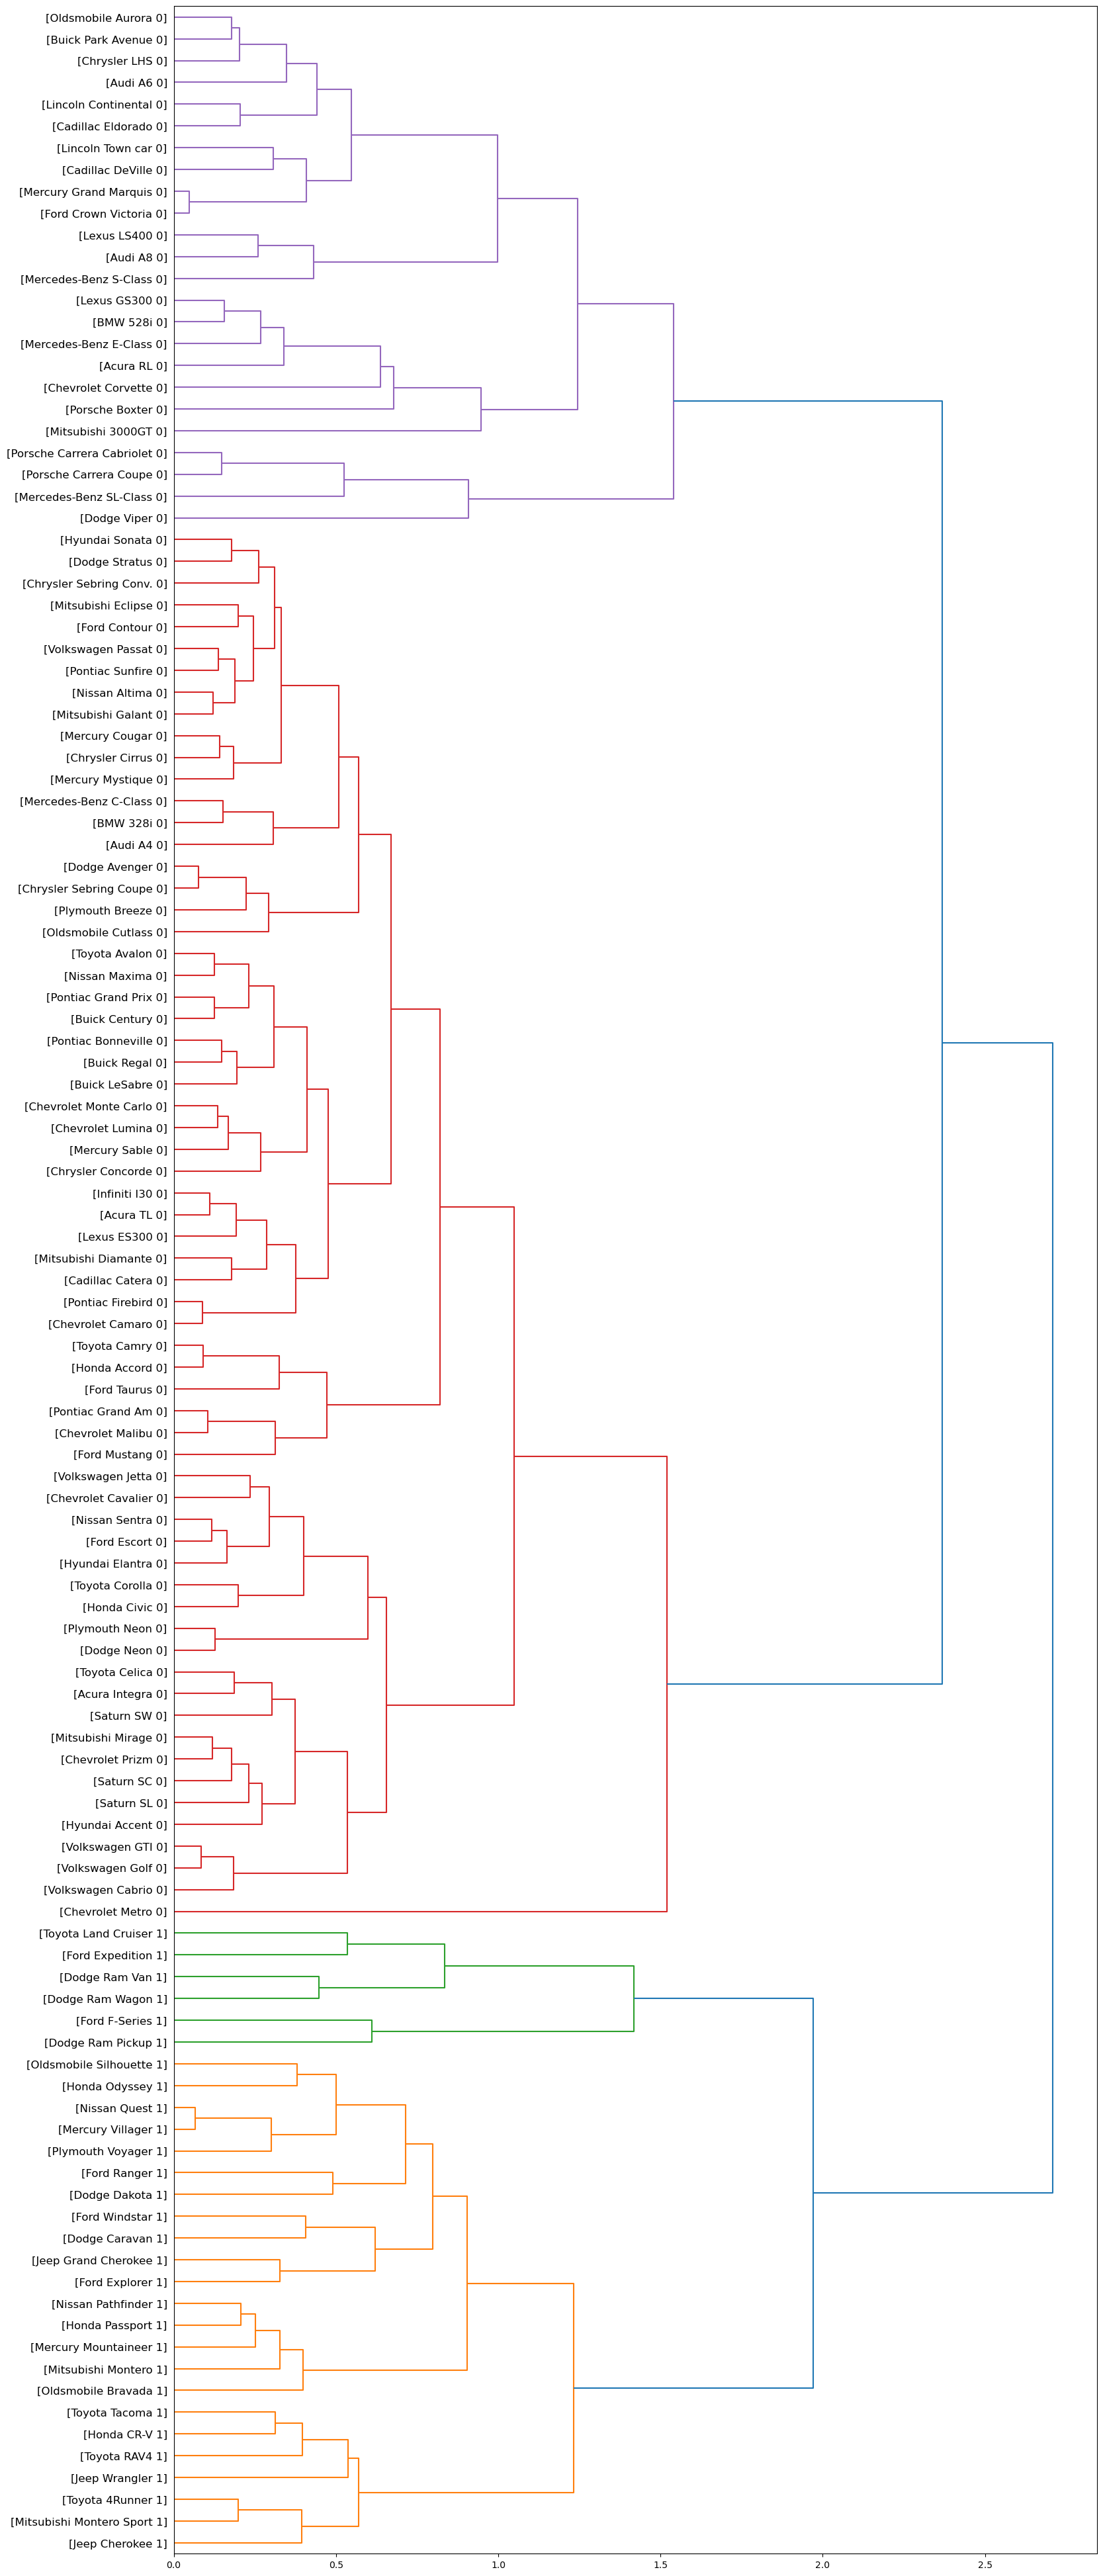

In [27]:
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.show()